#### Carga de recursos

In [3]:
# Instalo paquetes a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# Carga de base de datos
df = pd.read_csv ('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep = ";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Análisis exploratorio

In [5]:
# Veo las dimensiones de la base de datos
df.shape

(41188, 21)

In [6]:
# Listo las varibles que lo conforman y sus características principales
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

##### Análisis univariado

In [7]:
# Estadísiticos principales de las variables númericas
round(df.describe(),2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


In [8]:
df.describe (include = "O")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [9]:
# Hago un chequeo y elimniación de duplicados
df_n = df.drop_duplicates (subset = df.columns)

# Razon de casos duplicados
print (f'Se eliminaron {df.shape[0] - df_n.shape[0]} observaciones con datos duplicados en todas sus columnas')



Se eliminaron 12 observaciones con datos duplicados en todas sus columnas


/tmp/ipykernel_10357/3709353840.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_10357/3709353840.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_10357/3709353840.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_10357/3709353840.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_10357/3709353840.py:21: UserWarning: set_tick

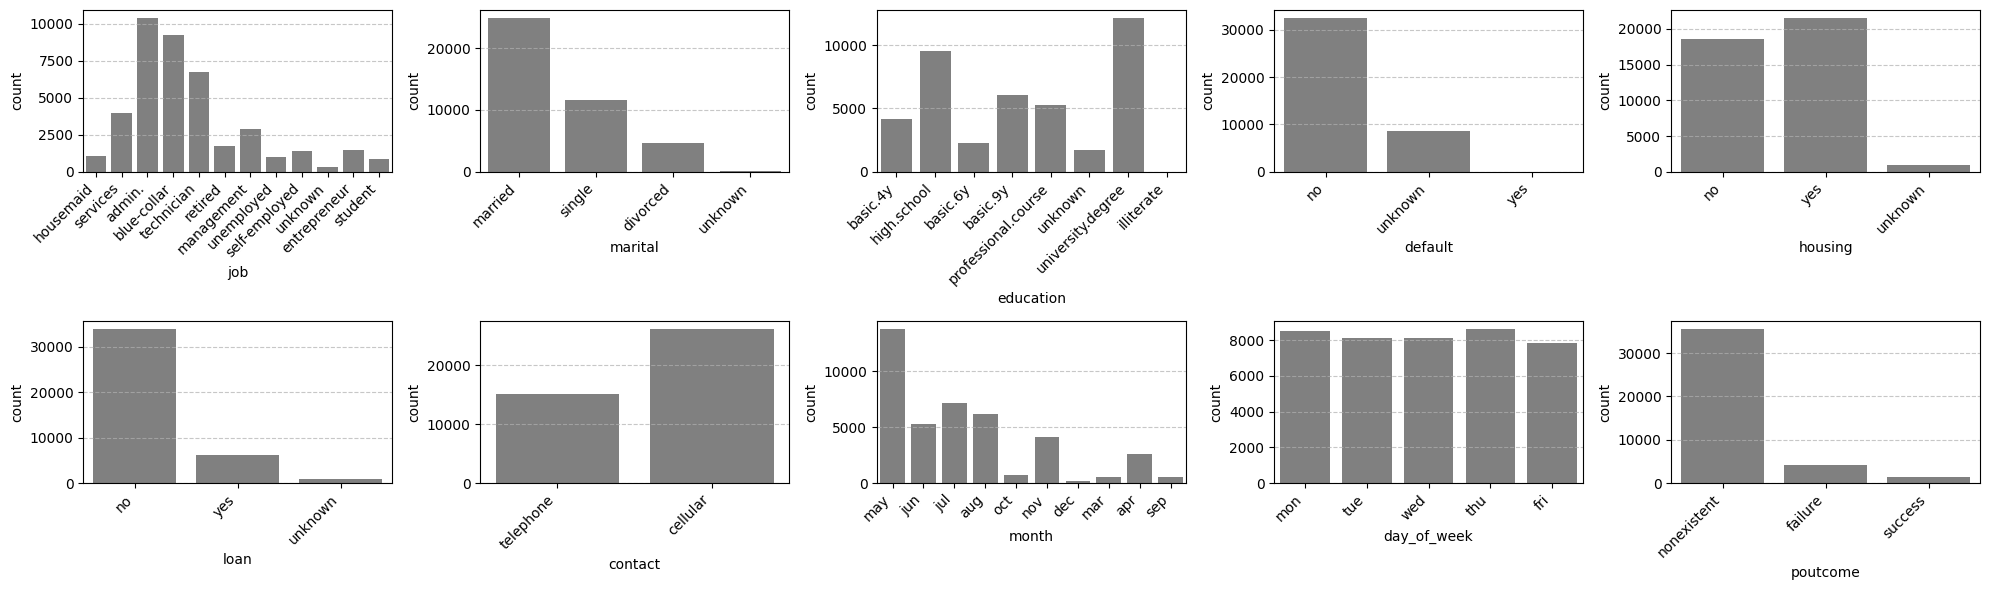

In [10]:
# Gráfico distribuciones de las variables categoricas

fig, axis = plt.subplots (2,5, figsize = (20, 6))

# Lista de variables categóricas
categorical_vars = ["job", "marital", "education", "default", "housing", 
                    "loan", "contact", "month", "day_of_week", "poutcome"]

# Recorrer las variables y crear los gráficos
for i, var in enumerate(categorical_vars):
    row, col = divmod(i, 5)  # Obtener fila y columna en la cuadrícula
    ax = axis[row, col]  # Seleccionar el eje correspondiente
    
    # Crear el gráfico de barras
    sns.countplot(ax=ax, data=df_n, x=var, color="grey")
    
    # Agregar lineas horizontales
    ax.yaxis.grid(True, linestyle="--", alpha=0.7)

    # Rotar etiquetas del eje X si es necesario
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Ajustar el diseño
plt.tight_layout()
plt.show()

/tmp/ipykernel_10357/3741349857.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_10357/3741349857.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_10357/3741349857.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_10357/3741349857.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_10357/3741349857.py:28: UserWarning: set_tick

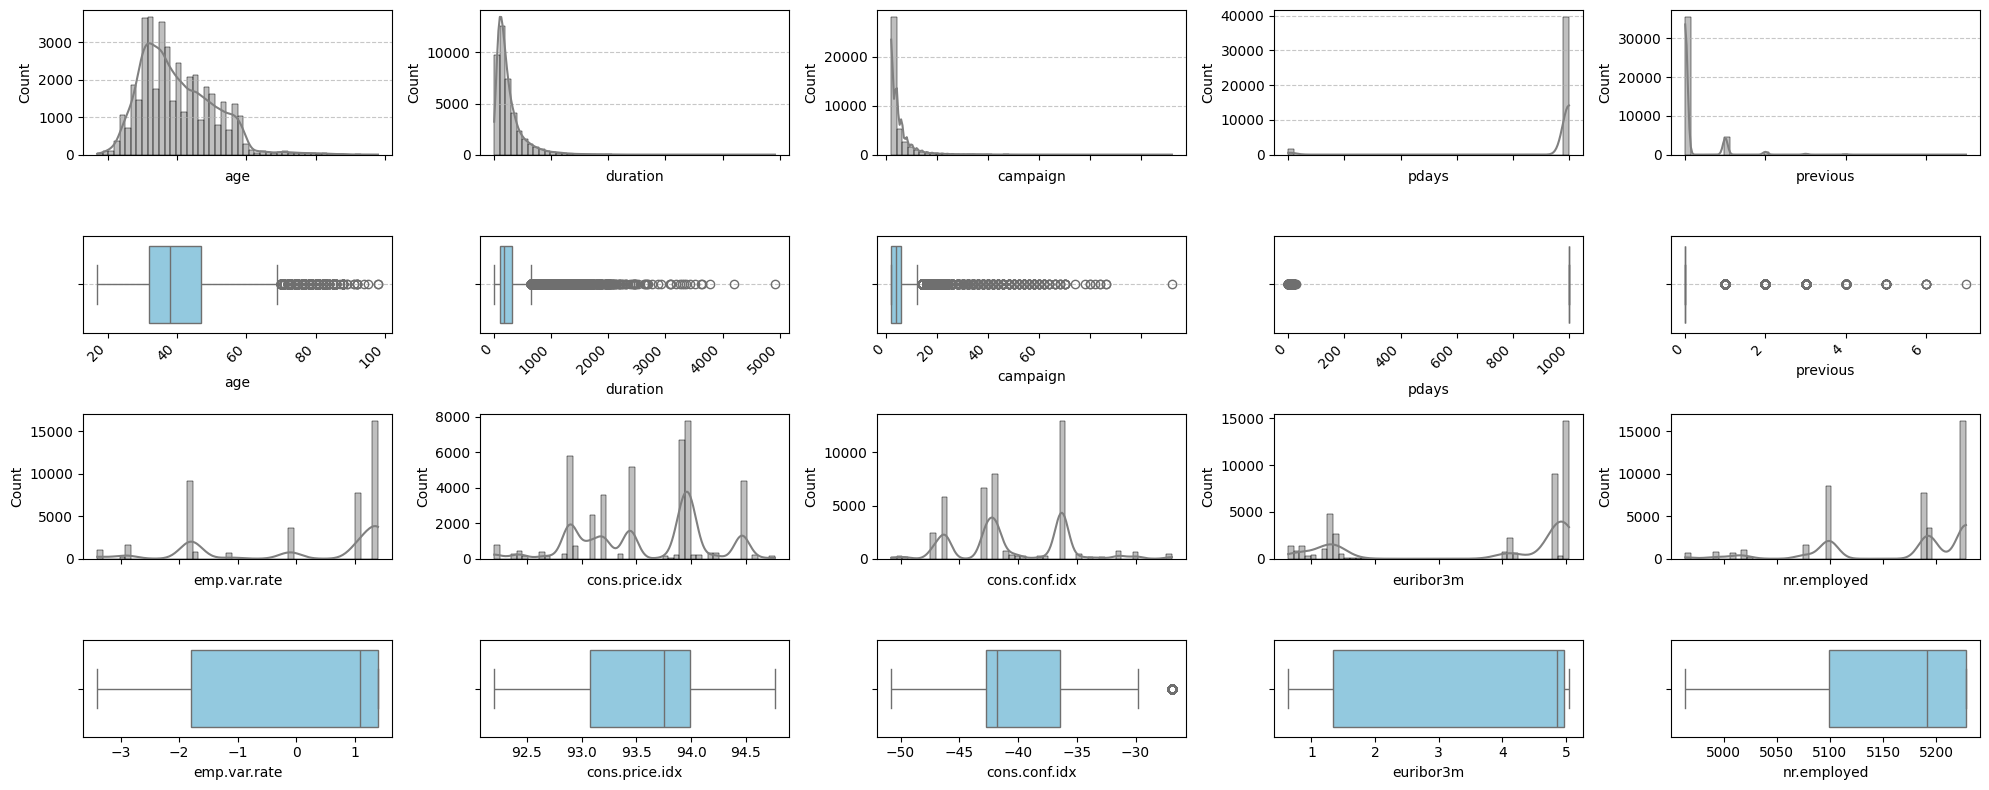

In [11]:
# Análisis de variables númericas
numeric_var = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Parámetros del gráfico
cols = 5
rows = int(np.ceil(len(numeric_var)/cols))
total_rows = rows * 2

fig, axis = plt.subplots (total_rows, cols, figsize = (20, total_rows*2),  gridspec_kw={'height_ratios': [6, 4]*rows})

for i, var in enumerate(numeric_var):
    row, col = divmod(i, cols)  # Obtener fila y columna en la cuadrícula
    ax = axis[row, col]  # Seleccionar el eje correspondiente
    ax_hist = axis[row*2, col]
    ax_box = axis[row*2+1, col]
    
    # Crear el gráfico de barras
    sns.histplot(ax=ax_hist, data=df_n, x=var, bins = 50, color="grey", kde=True)
    ax.yaxis.grid(True, linestyle="--", alpha=0.7)
    ax_hist.set_xticklabels([])  # Ocultar etiquetas en el histograma


    sns.boxplot(ax=ax_box, data=df_n, x=var, color = "skyblue")
    
    # Agregar lineas horizontales

    # Rotar etiquetas del eje X si es necesario
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Ajustar el diseño
plt.tight_layout()
plt.show()

#### Análisis multivariado

In [12]:
# Análsisi de variable objetivo (categorica)
print(df_n["y"].value_counts(normalize=True))

y
no     0.887337
yes    0.112663
Name: proportion, dtype: float64


/tmp/ipykernel_10357/1142768493.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_10357/1142768493.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_10357/1142768493.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_10357/1142768493.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_10357/1142768493.py:15: UserWarning: set_tick

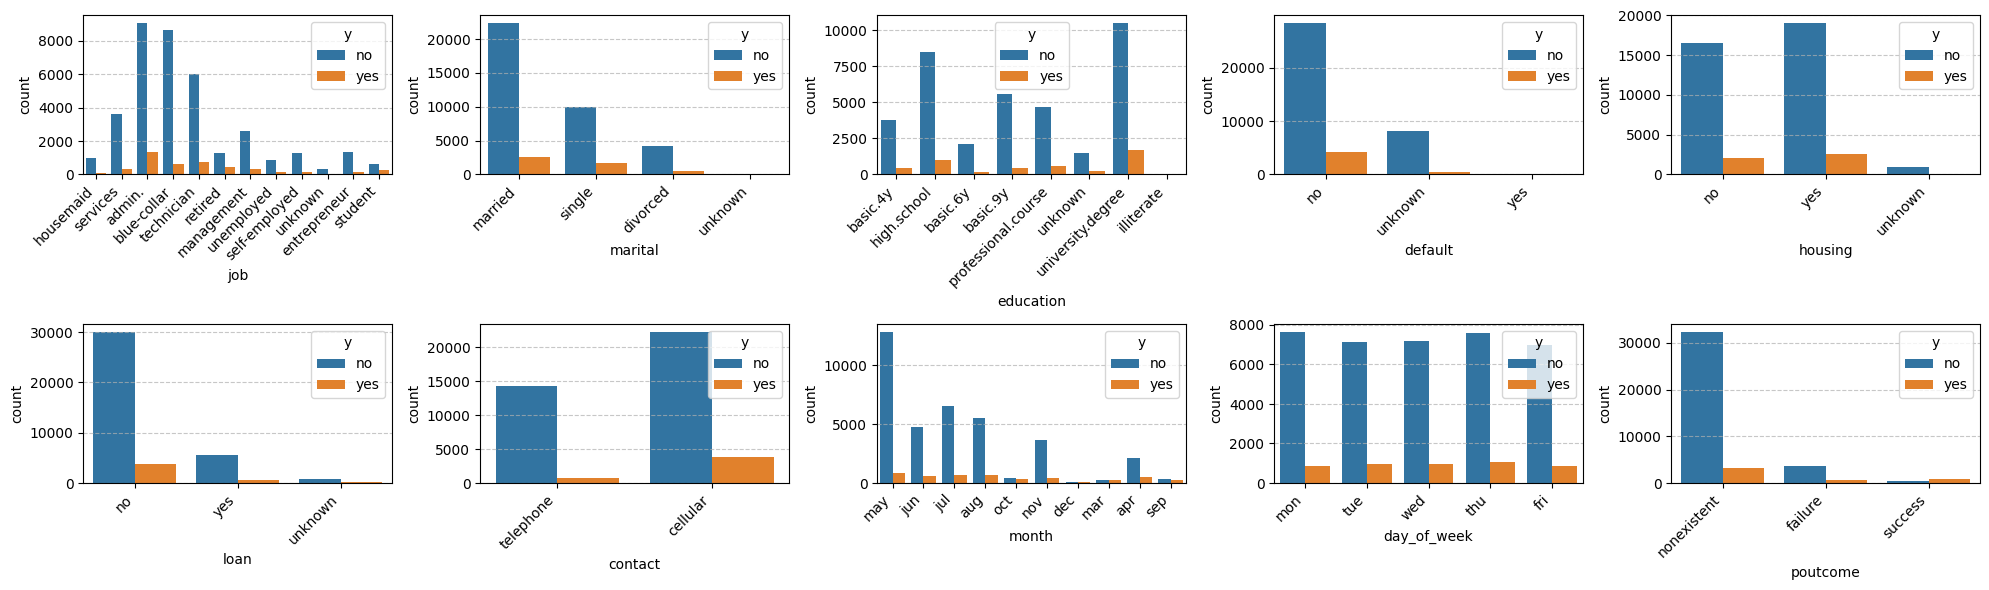

In [13]:
# Categorical - categorical analysis
fig, axis = plt.subplots (2,5, figsize = (20, 6))

for i, var in enumerate(categorical_vars):
    row, col = divmod(i, 5)  # Obtener fila y columna en la cuadrícula
    ax = axis[row, col]  # Seleccionar el eje correspondiente
    
    # Crear el gráfico de barras
    sns.countplot(ax=ax, data=df_n, x=var, hue = "y")
    
    # Agregar lineas horizontales
    ax.yaxis.grid(True, linestyle="--", alpha=0.7)

    # Rotar etiquetas del eje X si es necesario
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Ajustar el diseño
plt.tight_layout()
plt.show()

#### Analisis de correlaciones

<Axes: >

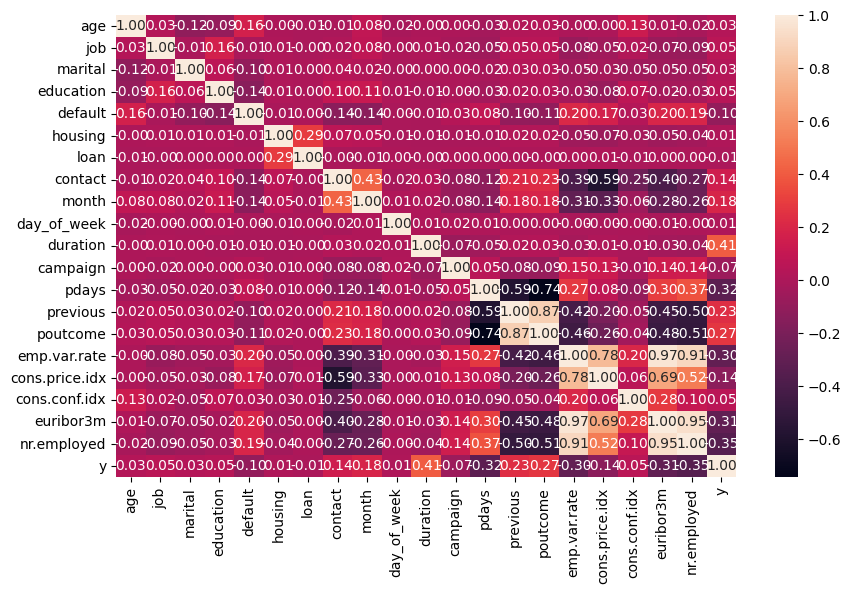

In [14]:
# Factorizar múltiples columnas categóricas
df_f = df_n.copy()

fig, axis = plt.subplots(figsize = (10, 6))

for col in categorical_vars: 
    df_f[col], _ = pd.factorize(df_f[col])

df_f["y"] = pd.factorize(df_f["y"])[0]

sns.heatmap(df_f.corr(), annot = True, fmt = ".2f")

In [15]:
# Filtro por las correlaciones más fuertes

# Calcular la correlación de todas las variables con "
correlation = df_f.corr()["y"].abs()
print (correlation)

age               0.030381
job               0.054829
marital           0.026363
education         0.045663
default           0.099364
housing           0.009605
loan              0.005051
contact           0.144774
month             0.183541
day_of_week       0.009993
duration          0.405297
campaign          0.066361
pdays             0.324948
previous          0.230202
poutcome          0.270399
emp.var.rate      0.298289
cons.price.idx    0.136134
cons.conf.idx     0.054802
euribor3m         0.307740
nr.employed       0.354669
y                 1.000000
Name: y, dtype: float64


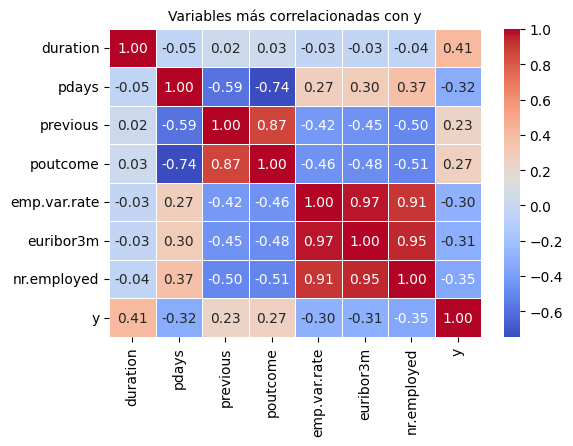

In [16]:
# Seleccionar solo las variables con correlación alta (mayor a 0.5 por ejemplo)
correlacion_fuerte = correlation[correlation > 0.2].index

# Crear un heatmap solo con estas variables
plt.figure(figsize=(6, 4))
sns.heatmap(df_f[correlacion_fuerte].corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

# Título
plt.title("Variables más correlacionadas con y", fontsize=10)

# Mostrar el gráfico
plt.show()

In [17]:
# Me quedo para el modelo solo con las variables más correlacionadas
df_m = df_f[correlacion_fuerte]
df_m.head()

,duration,pdays,previous,poutcome,emp.var.rate,euribor3m,nr.employed,y
0,261,999,0,0,1.1,4.857,5191.0,0
1,149,999,0,0,1.1,4.857,5191.0,0
2,226,999,0,0,1.1,4.857,5191.0,0
3,151,999,0,0,1.1,4.857,5191.0,0
4,307,999,0,0,1.1,4.857,5191.0,0


#### Identificación de outliers

In [18]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   duration      41176 non-null  int64  
 1   pdays         41176 non-null  int64  
 2   previous      41176 non-null  int64  
 3   poutcome      41176 non-null  int64  
 4   emp.var.rate  41176 non-null  float64
 5   euribor3m     41176 non-null  float64
 6   nr.employed   41176 non-null  float64
 7   y             41176 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 2.8 MB


In [19]:
round(df_m.describe())

,duration,pdays,previous,poutcome,emp.var.rate,euribor3m,nr.employed,y
count,41176.0,41176.0,41176.0,41176.0,41176.0,41176.0,41176.0,41176.0
mean,258.0,962.0,0.0,0.0,0.0,4.0,5167.0,0.0
std,259.0,187.0,0.0,0.0,2.0,2.0,72.0,0.0
min,0.0,0.0,0.0,0.0,-3.0,1.0,4964.0,0.0
25%,102.0,999.0,0.0,0.0,-2.0,1.0,5099.0,0.0
50%,180.0,999.0,0.0,0.0,1.0,5.0,5191.0,0.0
75%,319.0,999.0,0.0,0.0,1.0,5.0,5228.0,0.0
max,4918.0,999.0,7.0,2.0,1.0,5.0,5228.0,1.0


In [20]:
# La variable 'duration' sugiere por sus descriptivos que tiene outliers
duration_stats = df_m['duration'].describe()

duration_iqr = duration_stats["75%"] - duration_stats["25%"]
upper_limit = duration_stats["75%"] + 1.5 * duration_iqr
lower_limit = duration_stats["25%"] - 1.5 * duration_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(duration_iqr, 2)}")

The upper and lower limits for finding outliers are 644.5 and -223.5, with an interquartile range of 217.0


In [21]:
# Quito los outliers de la variable 'duration'
df_sin_out = df_m[(df_m['duration'] >= lower_limit) & (df_m['duration'] <= upper_limit)]
df_sin_out.shape[0]-df_n.shape[0]


-2963

In [22]:
df_sin_out.head()

,duration,pdays,previous,poutcome,emp.var.rate,euribor3m,nr.employed,y
0,261,999,0,0,1.1,4.857,5191.0,0
1,149,999,0,0,1.1,4.857,5191.0,0
2,226,999,0,0,1.1,4.857,5191.0,0
3,151,999,0,0,1.1,4.857,5191.0,0
4,307,999,0,0,1.1,4.857,5191.0,0


#### Entrenamiento del modelo

In [23]:
from sklearn.model_selection import train_test_split

X = df_sin_out.drop('y', axis = 1)
y = df_sin_out['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head().sort_index(ascending=[True])

,duration,pdays,previous,poutcome,emp.var.rate,euribor3m,nr.employed
4851,506,999,0,0,1.1,4.858,5191.0
17965,142,999,0,0,1.4,4.961,5228.1
23496,13,999,0,0,1.4,4.962,5228.1
33286,109,999,0,0,-1.8,1.291,5099.1
34972,391,999,0,0,-1.8,1.250,5099.1


In [24]:
# Normalización del data frame
from sklearn.preprocessing import StandardScaler

num_variables = df_sin_out.select_dtypes(include=['int64', 'float64']).columns
num_variables = num_variables.drop('y')

scaler = StandardScaler()
scaler.fit(X_train[num_variables])

X_train_norm = scaler.transform(X_train[num_variables])
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test[num_variables])
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,duration,pdays,previous,poutcome,emp.var.rate,euribor3m,nr.employed
33286,-0.672099,0.192651,-0.348302,-0.371337,-1.196723,-1.343032,-0.941464
17965,-0.438435,0.192651,-0.348302,-0.371337,0.838400,0.772165,0.845643
34972,1.324665,0.192651,-0.348302,-0.371337,-1.196723,-1.366663,-0.941464
4851,2.138948,0.192651,-0.348302,-0.371337,0.647607,0.712801,0.331677
23496,-1.351848,0.192651,-0.348302,-0.371337,0.838400,0.772741,0.845643


In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(7643,))

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9281695669239828

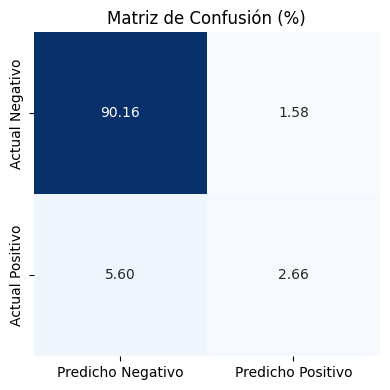

In [31]:
from sklearn.metrics import confusion_matrix

logistic_cm = confusion_matrix(y_test, y_pred)

cm_percent = logistic_cm.astype(np.float64) / logistic_cm.sum() * 100  # Normalizar por el total

cm_df = pd.DataFrame(cm_percent, index=["Actual Negativo", "Actual Positivo"], 
                     columns=["Predicho Negativo", "Predicho Positivo"])

# Graficar el heatmap con porcentajes
plt.figure(figsize=(4, 4))
sns.heatmap(cm_df, annot=True, fmt=".2f", cbar=False, cmap="Blues")

plt.title("Matriz de Confusión (%)")
plt.tight_layout()
plt.show()